In [94]:
# YOUR CODE HERE
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [95]:
url = "http://books.toscrape.com/"

# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
# TODO: Create a `BeautifulSoup` instance with that data

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [96]:
type(soup)

bs4.BeautifulSoup

In [97]:
books_html = soup.find_all("article", class_="product_pod")
len(books_html)

20

## Parsing _one_ book

In [98]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

## Parsing one book name

In [12]:
book_title = books_html[0].find("h3").find("a")["title"]
book_title

'A Light in the Attic'

## Parsing one book price

In [99]:
book_price = books_html[0].find("p", class_="price_color").text
book_price

'£51.77'

In [100]:
book_price = float(book_price[1:])
type(book_price)


float

## Parsing one book rating

In [112]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [107]:
book_star_html = [book.find("p", class_="star-rating") for book in books_html]
book_star_html

[<p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 <p class="star-rating Four">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 <p class="star-rating Five">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i 

In [109]:
rating_class = [tag.attrs["class"][1] for tag in book_star_html]
rating_class


['Three',
 'One',
 'One',
 'Four',
 'Five',
 'One',
 'Four',
 'Three',
 'Four',
 'One',
 'Two',
 'Four',
 'Five',
 'Five',
 'Five',
 'Three',
 'One',
 'One',
 'Two',
 'Two']

In [116]:
def parse_rating(book_star_html):
    rating_class = book_star_html.attrs["class"][1]
    mapping = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
    return mapping[rating_class]


In [117]:
book_rating = parse_rating(book_stars_html)
book_rating

3

## Parsing _all_ books

In [118]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

In [125]:
for books_html in soup.find_all("article", class_="product_pod"):
    book_title = books_html.find("h3").find("a")["title"],
    book_price = books_html.find("p", class_="price_color").text.strip("£"),
    book_rating = parse_rating(books_html.find("p", class_="star-rating"))
    books_dict["Title"].append(book_title),
    books_dict["Price"].append(book_price),
    books_dict["Rating"].append(book_rating)
books_dict


{'Title': [('A Light in the Attic',),
  ('Tipping the Velvet',),
  ('Soumission',),
  ('Sharp Objects',),
  ('Sapiens: A Brief History of Humankind',),
  ('The Requiem Red',),
  ('The Dirty Little Secrets of Getting Your Dream Job',),
  ('The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',),
  ('The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',),
  ('The Black Maria',),
  ('Starving Hearts (Triangular Trade Trilogy, #1)',),
  ("Shakespeare's Sonnets",),
  ('Set Me Free',),
  ("Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",),
  ('Rip it Up and Start Again',),
  ('Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',),
  ('Olio',),
  ('Mesaerion: The Best Science Fiction Stories 1800-1849',),
  ('Libertarianism for Beginners',),
  ("It's Only the Himalayas",)],
 'Price': [('51.77',),
  ('53.74',),
  ('50.10',),
  ('47.82',),
  ('54.23',),
  ('22.65',),
  ('33.34'

In [126]:
len(books_dict)          # 3 key:value çifti olmalı

3

In [127]:
len(books_dict["Title"]) # Her listede 20 kitap olmalı

20

In [128]:
books_dict = pd.DataFrame(books_dict)
books_dict.head()

,Title,Price,Rating
0,"(A Light in the Attic,)","(51.77,)",3
1,"(Tipping the Velvet,)","(53.74,)",1
2,"(Soumission,)","(50.10,)",1
3,"(Sharp Objects,)","(47.82,)",4
4,"(Sapiens: A Brief History of Humankind,)","(54.23,)",5


In [129]:
books_dict = books_dict.applymap(
    lambda x: x[0] if isinstance(x, tuple) else x
)
books_dict.head()

/var/folders/cz/4fnqmsqn071df7ryv9gz5tzr0000gn/T/ipykernel_19392/3896498510.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  books_dict = books_dict.applymap(


,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5


In [130]:
books_dict["Price"] = books_dict["Price"].astype(float)


In [131]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_dict.columns,
    title=str(books_dict.loc[0,'Title']),
    price=books_dict.loc[0,'Price'],
    rating=books_dict.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/elifcubukcu/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/elifcubukcu/data-book-scraping/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.58s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origin master



## Other pages 

In [132]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"
url

'http://books.toscrape.com/catalogue/page-1.html'

In [133]:
MAX_PAGE = 50
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html
http://books.toscrape.com/catalogue/page-4.html
http://books.toscrape.com/catalogue/page-5.html
http://books.toscrape.com/catalogue/page-6.html
http://books.toscrape.com/catalogue/page-7.html
http://books.toscrape.com/catalogue/page-8.html
http://books.toscrape.com/catalogue/page-9.html
http://books.toscrape.com/catalogue/page-10.html
http://books.toscrape.com/catalogue/page-11.html
http://books.toscrape.com/catalogue/page-12.html
http://books.toscrape.com/catalogue/page-13.html
http://books.toscrape.com/catalogue/page-14.html
http://books.toscrape.com/catalogue/page-15.html
http://books.toscrape.com/catalogue/page-16.html
http://books.toscrape.com/catalogue/page-17.html
http://books.toscrape.com/catalogue/page-18.html
http://books.toscrape.com/catalogue/page-19.html
http://books.toscrape.com/catalogue/page-20.html
http://books.toscrape.com/cat

In [135]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    for book in soup.find_all("article", class_="product_pod"):
            title = book.find("h3").find("a")["title"],
            price = float(book.find("p", class_="price_color").text.strip("£")),
            rating = parse_rating(book.find("p", class_="star-rating")),
            all_books_dict["Title"].append(title),
            all_books_dict["Price"].append(price),
            all_books_dict["Rating"].append(rating)
print("Done!")

Done!


In [136]:
len(all_books_dict["Title"])

1000

In [137]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
995,(Alice in Wonderland (Alice's Adventures in Wo...,"(55.53,)","(1,)"
996,"(Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human ...","(57.06,)","(4,)"
997,(A Spy's Devotion (The Regency Spies of London...,"(16.97,)","(5,)"
998,"(1st to Die (Women's Murder Club #1),)","(53.98,)","(1,)"
999,"(1,000 Places to See Before You Die,)","(26.08,)","(5,)"


In [138]:
all_books_df = all_books_df.applymap(
    lambda x: x[0] if isinstance(x, tuple) else x
)
all_books_df.head()

/var/folders/cz/4fnqmsqn071df7ryv9gz5tzr0000gn/T/ipykernel_19392/745023294.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_books_df = all_books_df.applymap(


,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5


<Axes: >

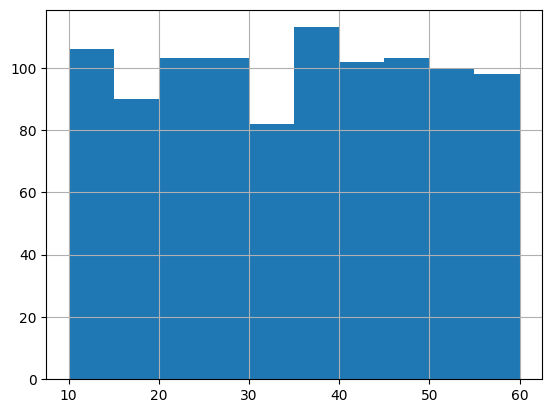

In [139]:
all_books_df["Price"].hist()

<Axes: xlabel='Rating'>

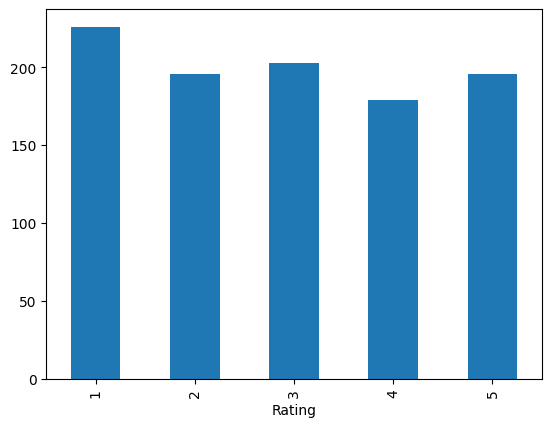

In [140]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [141]:
all_books_df.to_csv("books.csv")

In [142]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.


In [143]:
all_books_df.to_excel('books.xlsx', sheet_name='Books')